In [1]:
import numpy as np
import math 
import cv2
import matplotlib.pyplot as plt

In [7]:
def gaussianFunction(sigma, a, b):
    l = math.pow(2.71, (-(b**2 + a**2)/(2 * sigma * sigma))) / (2 * math . pi * sigma * sigma)
    return l

In [10]:
def gausianFilter(sigma):
    c = int(np.ceil(3 * sigma))
    row = col = 2 * c + 1
    filter = np.zeros((row, col))
    kernel = [x for x in range( -c, c+1)]
    for i in range(len(kernel)):
        for j in range(len(kernel)):
            filter[i][j] = gaussianFunction(sigma, kernel[i], kernel[j])
    return (filter / np.sum(filter))

In [25]:
sigma = 0.5
gausianFilter(sigma)

array([[7.29162520e-08, 2.88828525e-05, 2.12118557e-04, 2.88828525e-05,
        7.29162520e-08],
       [2.88828525e-05, 1.14407851e-02, 8.40222698e-02, 1.14407851e-02,
        2.88828525e-05],
       [2.12118557e-04, 8.40222698e-02, 6.17067952e-01, 8.40222698e-02,
        2.12118557e-04],
       [2.88828525e-05, 1.14407851e-02, 8.40222698e-02, 1.14407851e-02,
        2.88828525e-05],
       [7.29162520e-08, 2.88828525e-05, 2.12118557e-04, 2.88828525e-05,
        7.29162520e-08]])

In [26]:
np.sum(gausianFilter(sigma))

1.0

In [30]:
def convolution(image, kernel):
    imageHeight, imageWidth = len(image), len(image[0]) #gives the number of rows and columns of the matrices
    kernelHeight, kernelWidth = len(kernel), len(kernel[0])

    padHeight = kernelHeight // 2   # floor division
    padWidth = kernelWidth // 2

    paddedImage = np.pad(image,((padHeight, padHeight), (padWidth, padWidth)), mode = 'constant', constant_values = 0)

    result = np.zeros_like(image)

    for i in range(imageHeight):
        for j in range(imageWidth):
            sum = 0
            for a in range(kernelHeight):
                for b in range(kernelWidth):
                    sum += paddedImage[ i + a ][ j + b ] * kernel[a][b]
            result[i][j] = sum
    return result

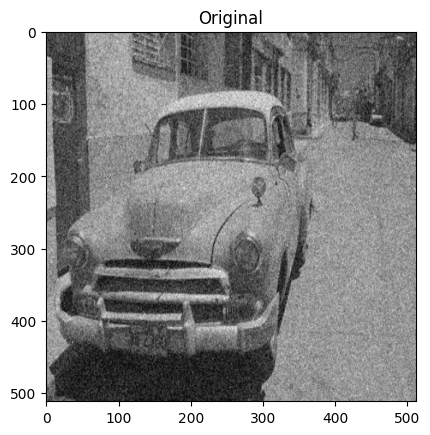

In [31]:
image = cv2.imread('car1.png', 0)
image = cv2.resize(image,(512,512))
plt.imshow(image, cmap = 'gray')
plt.title("Original")
plt.show()

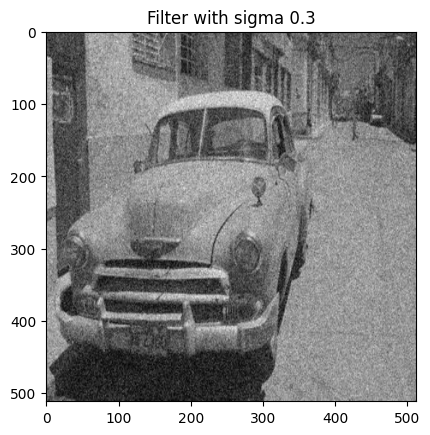

In [35]:
sigma = 0.3
img = convolution(image, gausianFilter(sigma))
plt.imshow(img, cmap = 'gray')
plt.title("Filter with sigma 0.3")
plt.show()

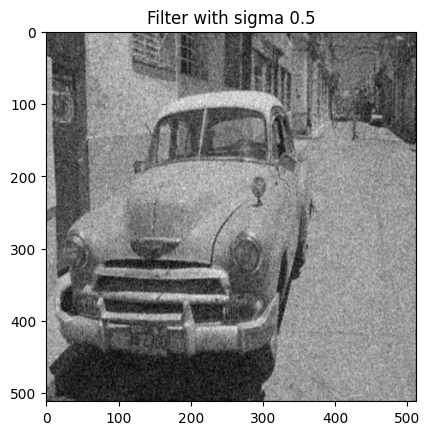

In [34]:
sigma = 0.5
img = convolution(image, gausianFilter(sigma))
plt.imshow(img, cmap = 'gray')
plt.title("Filter with sigma 0.5")
plt.show()

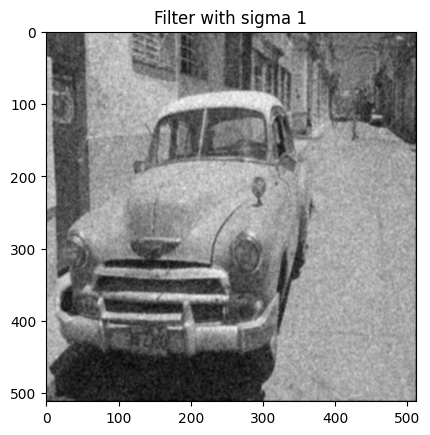

In [36]:
sigma = 1
img = convolution(image, gausianFilter(sigma))
plt.imshow(img, cmap = 'gray')
plt.title("Filter with sigma 1")
plt.show()

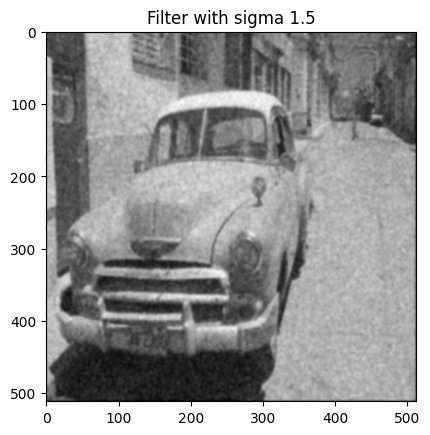

In [37]:
sigma = 1.5
img = convolution(image, gausianFilter(sigma))
plt.imshow(img, cmap = 'gray')
plt.title("Filter with sigma 1.5")
plt.show()

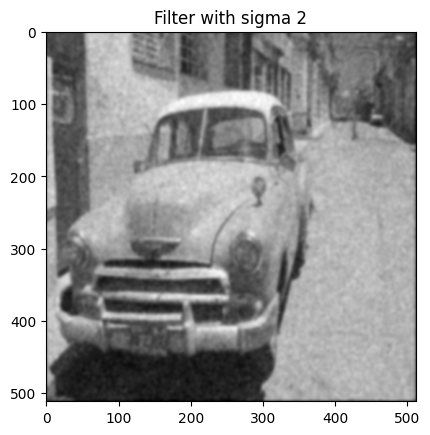

In [38]:
sigma = 2
img = convolution(image, gausianFilter(sigma))
plt.imshow(img, cmap = 'gray')
plt.title("Filter with sigma 2")
plt.show()

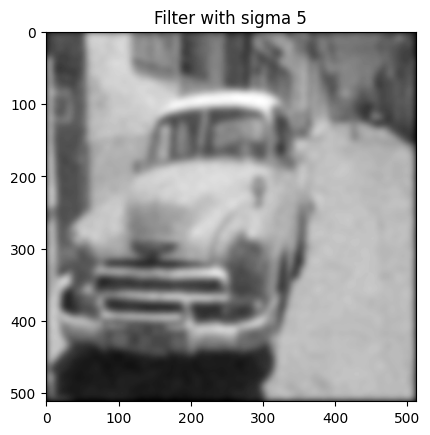

In [39]:
sigma = 5
img = convolution(image, gausianFilter(sigma))
plt.imshow(img, cmap = 'gray')
plt.title("Filter with sigma 5")
plt.show()